<a href="https://colab.research.google.com/github/anushree415/Deep-learning-Assignment/blob/main/CNN_FLOWERS_TRANSFER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anushree.D
Transfer Learning on TensorFlow Flowers

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os

os.makedirs('results', exist_ok=True)
os.makedirs('models', exist_ok=True)
print("TF version:", tf.__version__)


TF version: 2.19.0


In [ ]:
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
print(info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.GUI1Z9_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/root/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.ten

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
IMG_SIZE = 224
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds = dataset['train'].map(format_image, num_parallel_calls=AUTOTUNE)
ds = ds.shuffle(1024)
num_examples = info.splits['train'].num_examples
val_size = int(0.1 * num_examples)

train_ds = ds.skip(val_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds   = ds.take(val_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)
num_classes = info.features['label'].num_classes
print("Num classes:", num_classes)


Num classes: 5


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3), weights='imagenet')
base_model.trainable = False

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,055,976 (15.47 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=6)


Epoch 1/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 73s 404ms/step - accuracy: 0.2320 - loss: 1.6268 - val_accuracy: 0.1935 - val_loss: 1.6072
Epoch 2/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.2185 - loss: 1.6274 - val_accuracy: 0.1826 - val_loss: 1.6337
Epoch 3/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.2220 - loss: 1.6230 - val_accuracy: 0.2480 - val_loss: 1.6025
Epoch 4/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.2355 - loss: 1.6304 - val_accuracy: 0.2425 - val_loss: 1.6031
Epoch 5/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.2354 - loss: 1.6235 - val_accuracy: 0.2589 - val_loss: 1.5980
Epoch 6/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.2247 - loss: 1.6165 - val_accuracy: 0.1962 - val_loss: 1.6223


In [ ]:
# Unfreeze some layers and fine-tune
base_model.trainable = True
# Freeze until layer index (choose a reasonable index)
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_fine = model.fit(train_ds, validation_data=val_ds, epochs=6)


Epoch 1/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 95s 438ms/step - accuracy: 0.2170 - loss: 1.6516 - val_accuracy: 0.2044 - val_loss: 1.6051
Epoch 2/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.3297 - loss: 1.5194 - val_accuracy: 0.2425 - val_loss: 1.6216
Epoch 3/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.3531 - loss: 1.4713 - val_accuracy: 0.2316 - val_loss: 1.5856
Epoch 4/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.4101 - loss: 1.4200 - val_accuracy: 0.3924 - val_loss: 1.4769
Epoch 5/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.4380 - loss: 1.3646 - val_accuracy: 0.4441 - val_loss: 1.3532
Epoch 6/6
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.4519 - loss: 1.3293 - val_accuracy: 0.4905 - val_loss: 1.3148


In [ ]:
# Run this in Colab (or locally in a Python environment)
import nbformat
from google.colab import files

in_name = 'CNN_FLOWERS_TRANSFER.ipynb'   # change if your filename differs
out_name = 'CNN_FLOWERS_TRANSFER_fixed.ipynb'

# Read notebook without converting versions
nb = nbformat.read(in_name, as_version=nbformat.NO_CONVERT)

# Ensure top-level metadata.widgets.state exists
if 'widgets' in nb.get('metadata', {}) and 'state' not in nb['metadata']['widgets']:
    nb['metadata']['widgets']['state'] = {}

# Ensure each cell's metadata.widgets has a 'state' key
for cell in nb.get('cells', []):
    meta = cell.get('metadata', {})
    if 'widgets' in meta and isinstance(meta['widgets'], dict) and 'state' not in meta['widgets']:
        meta['widgets']['state'] = {}

# Write fixed notebook
nbformat.write(nb, out_name)
print('Saved:', out_name)

# Offer download
files.download(out_name)


FileNotFoundError: [Errno 2] No such file or directory: 'CNN_FLOWERS_TRANSFER.ipynb'

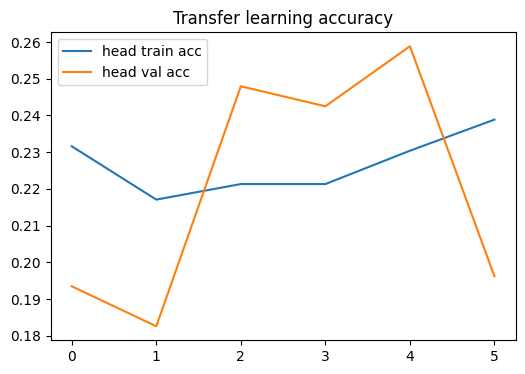

In [ ]:
model.save('models/flowers_efficientnetb0.h5')

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='head train acc')
plt.plot(history.history['val_accuracy'], label='head val acc')
plt.legend(); plt.title('Transfer learning accuracy')
plt.savefig('results/flowers_transfer_accuracy.png')
plt.show()
